In [1]:
# เชื่อมต่อข้อมูลจาก google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
HOME = "/content/drive/MyDrive/eggs_size_yolov8" # ตั้งค่าโฟลเดอร์การทำงาน
print(HOME)

/content/drive/MyDrive/eggs_size_yolov8


In [3]:
%cd {HOME}

/content/drive/MyDrive/eggs_size_yolov8


In [4]:
# Pip install method (recommended)
# ติดตั้งไลบรารี่

!pip install ultralytics==8.0.196 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

## **training and testing the yolo model**

In [23]:
import yaml

# Create configuration
# ตั้งค่าเส้นทางไปยังโฟลเดอร์ที่เก็บข้อมูลสำหรับการ train model [train, val, test]
# nc คือ จำนวน class ในที่นี้มี 4 class คือ เบอร์ไข่ 0,1,2,3 รวมเป็น 4
# names คือชื่อของ class นั้นๆ ในที่นี้คือ ไข่เบอร์ 0,1,2,3

config = {

   "train": "/content/drive/MyDrive/eggs_size_yolov8/Eggs_Train_Test_Val/train",
   "val": "/content/drive/MyDrive/eggs_size_yolov8/Eggs_Train_Test_Val/val",
   "test": "/content/drive/MyDrive/eggs_size_yolov8/Eggs_Train_Test_Val/test",
   "nc": 4,
   "names": ['0','1','2','3']
}

# save file เก็บไว้
with open("data.yaml", "w") as file:
   yaml.dump(config, file, default_flow_style=False)

####### การเทรนโมเดลอยู่ตรงนี้ ใช้คำสั่งนี้ได้เลย
# เทรนทั้งหมด ... รอบ ตั้งค่าขนาดรูปภาพเป็น 800
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=50 imgsz=800 plots=True

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [7]:
!ls {HOME}/runs/detect/train5/ # พอโมเดลเทรนเสร็จไฟล์ต่างๆก็จะเข้ามาอยู่ในโฟลเดอร์ runs/detect/train

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1726145922.7cb4f3ecfd80.1987.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch960.jpg	weights
P_curve.png					    train_batch961.jpg
PR_curve.png					    train_batch962.jpg


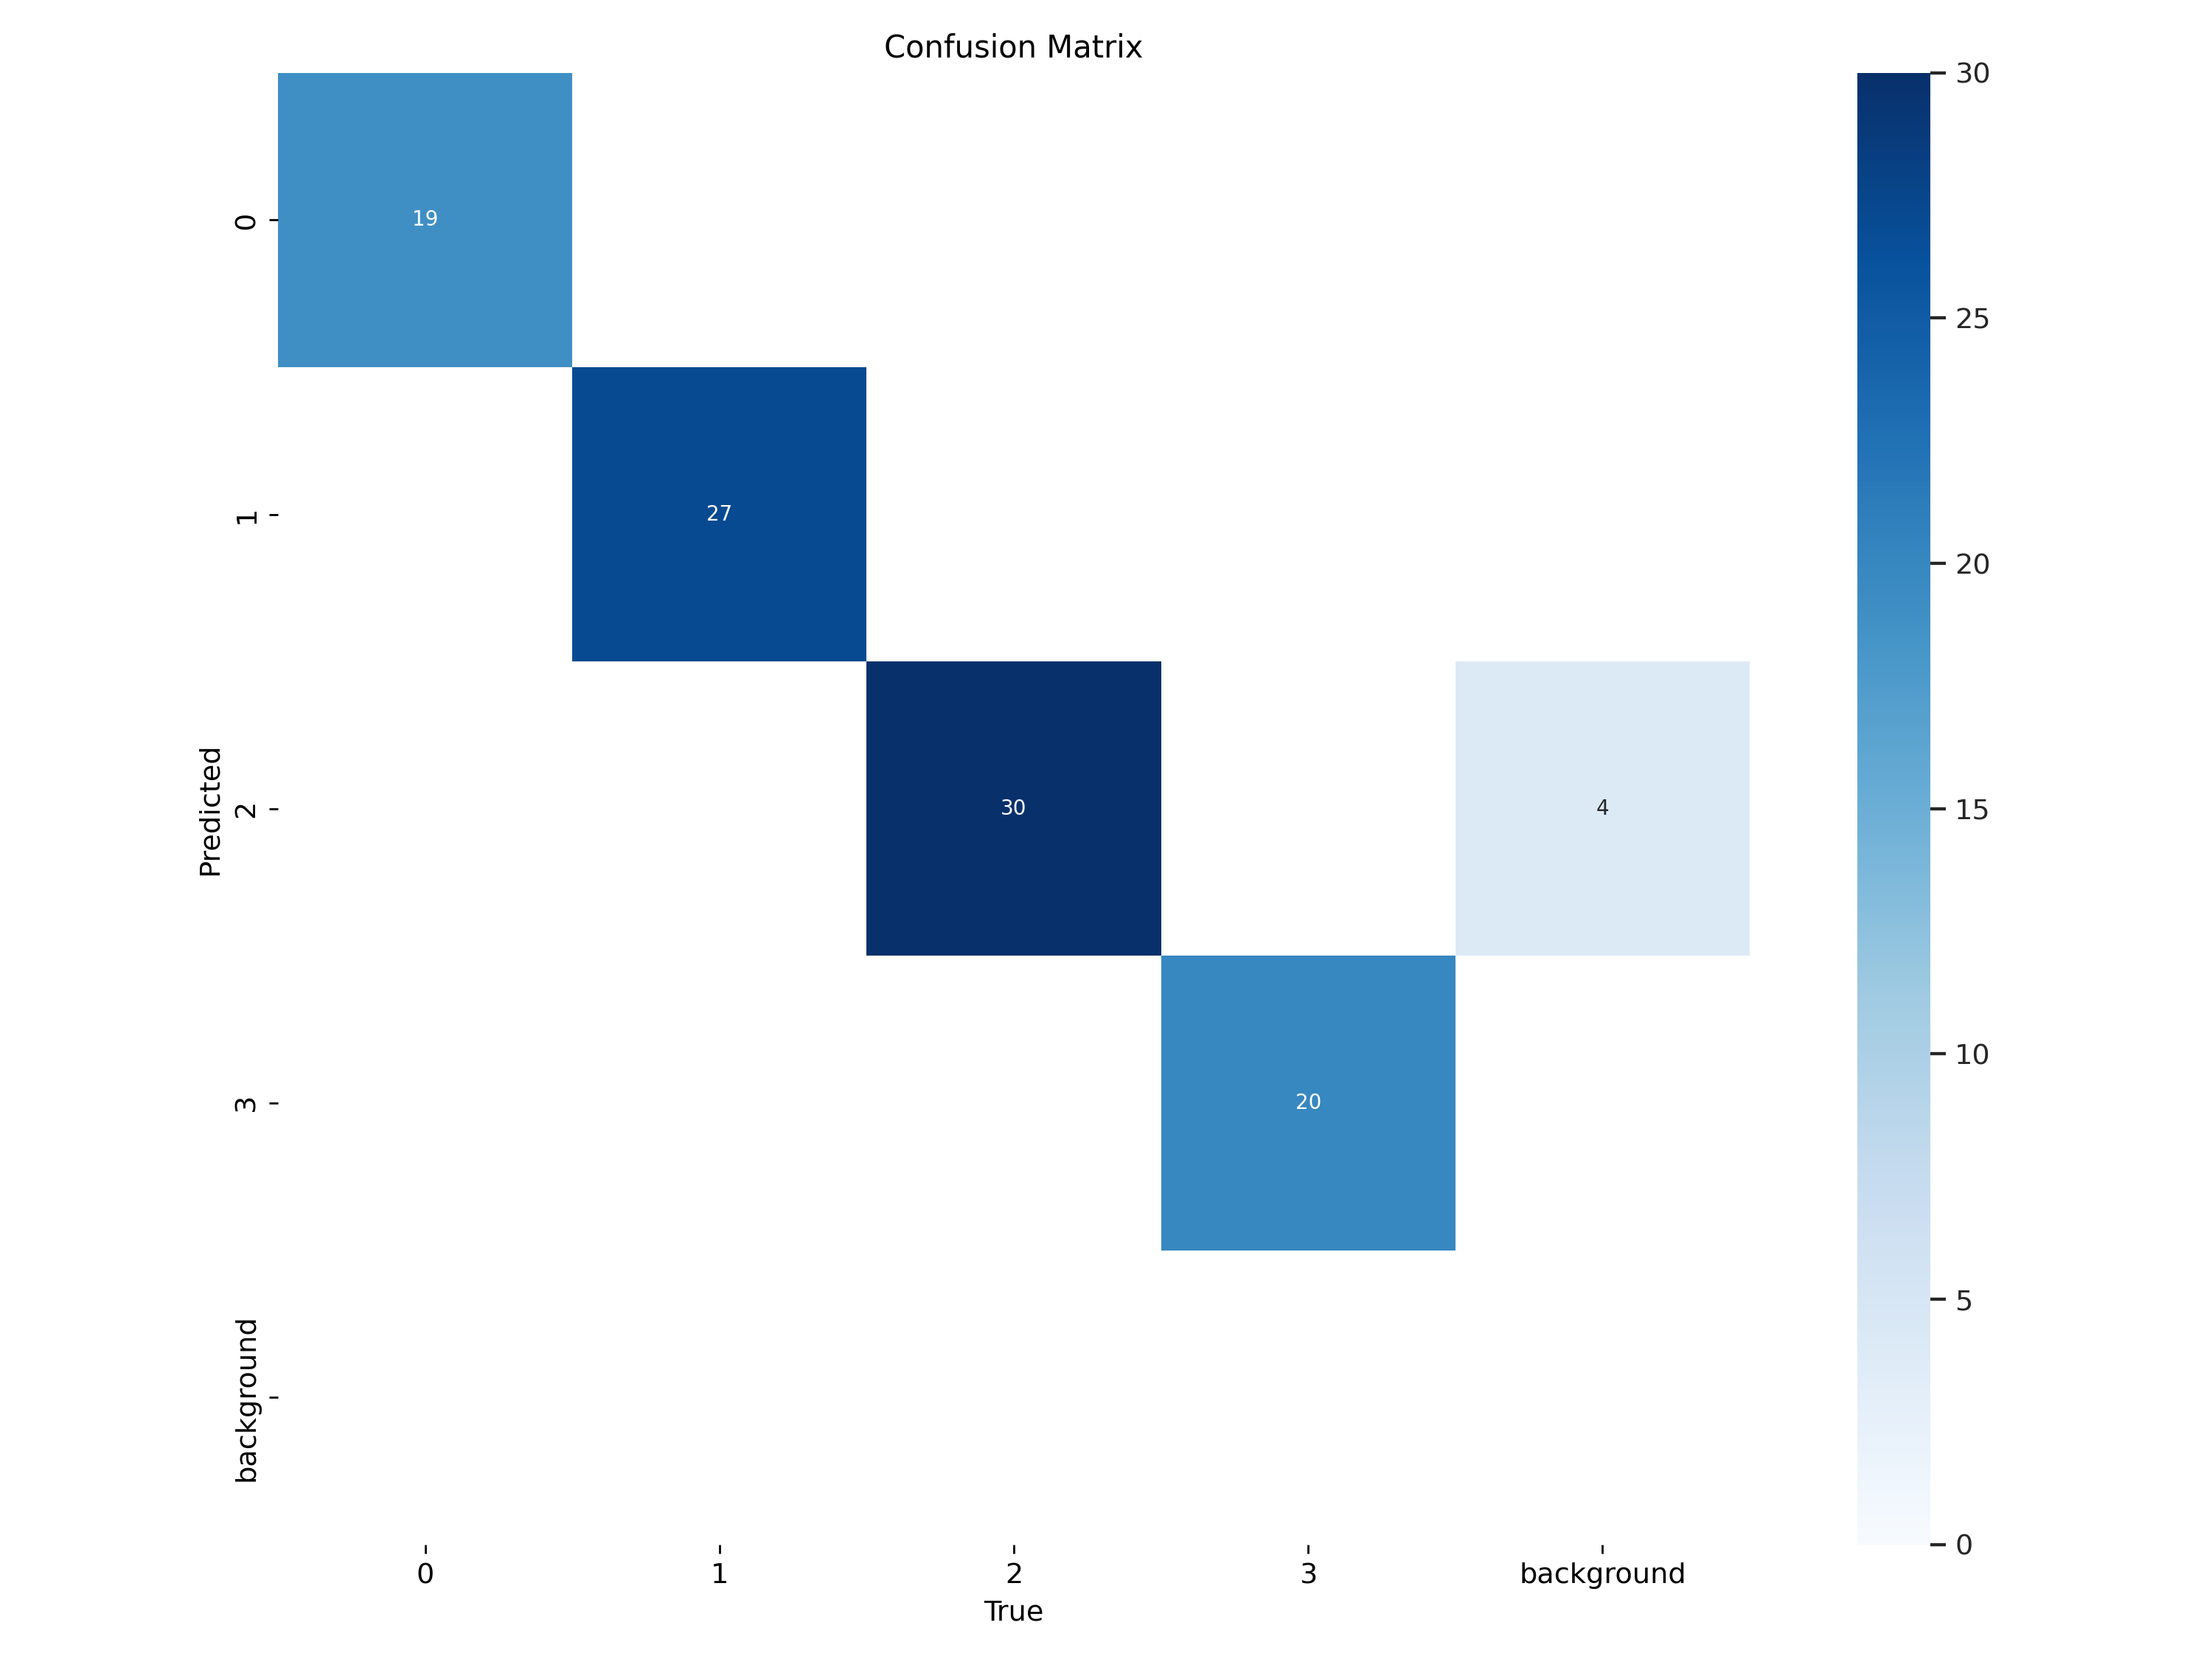

In [8]:
# plot ภาพเพื่อดูประสิทธิภาพของโมเดล ของการทำนายข้อมูลชุด valiadation
# จากในรูปจะเห็นว่าโมเดลผิดไปรูปนึงคือทำนายว่าเป็นไข่เบอร์ 3 แต่จริงๆแล้วเป็นไข่เบอร์ 2
Image(filename=f'{HOME}/runs/detect/train5/confusion_matrix.png', width=600)

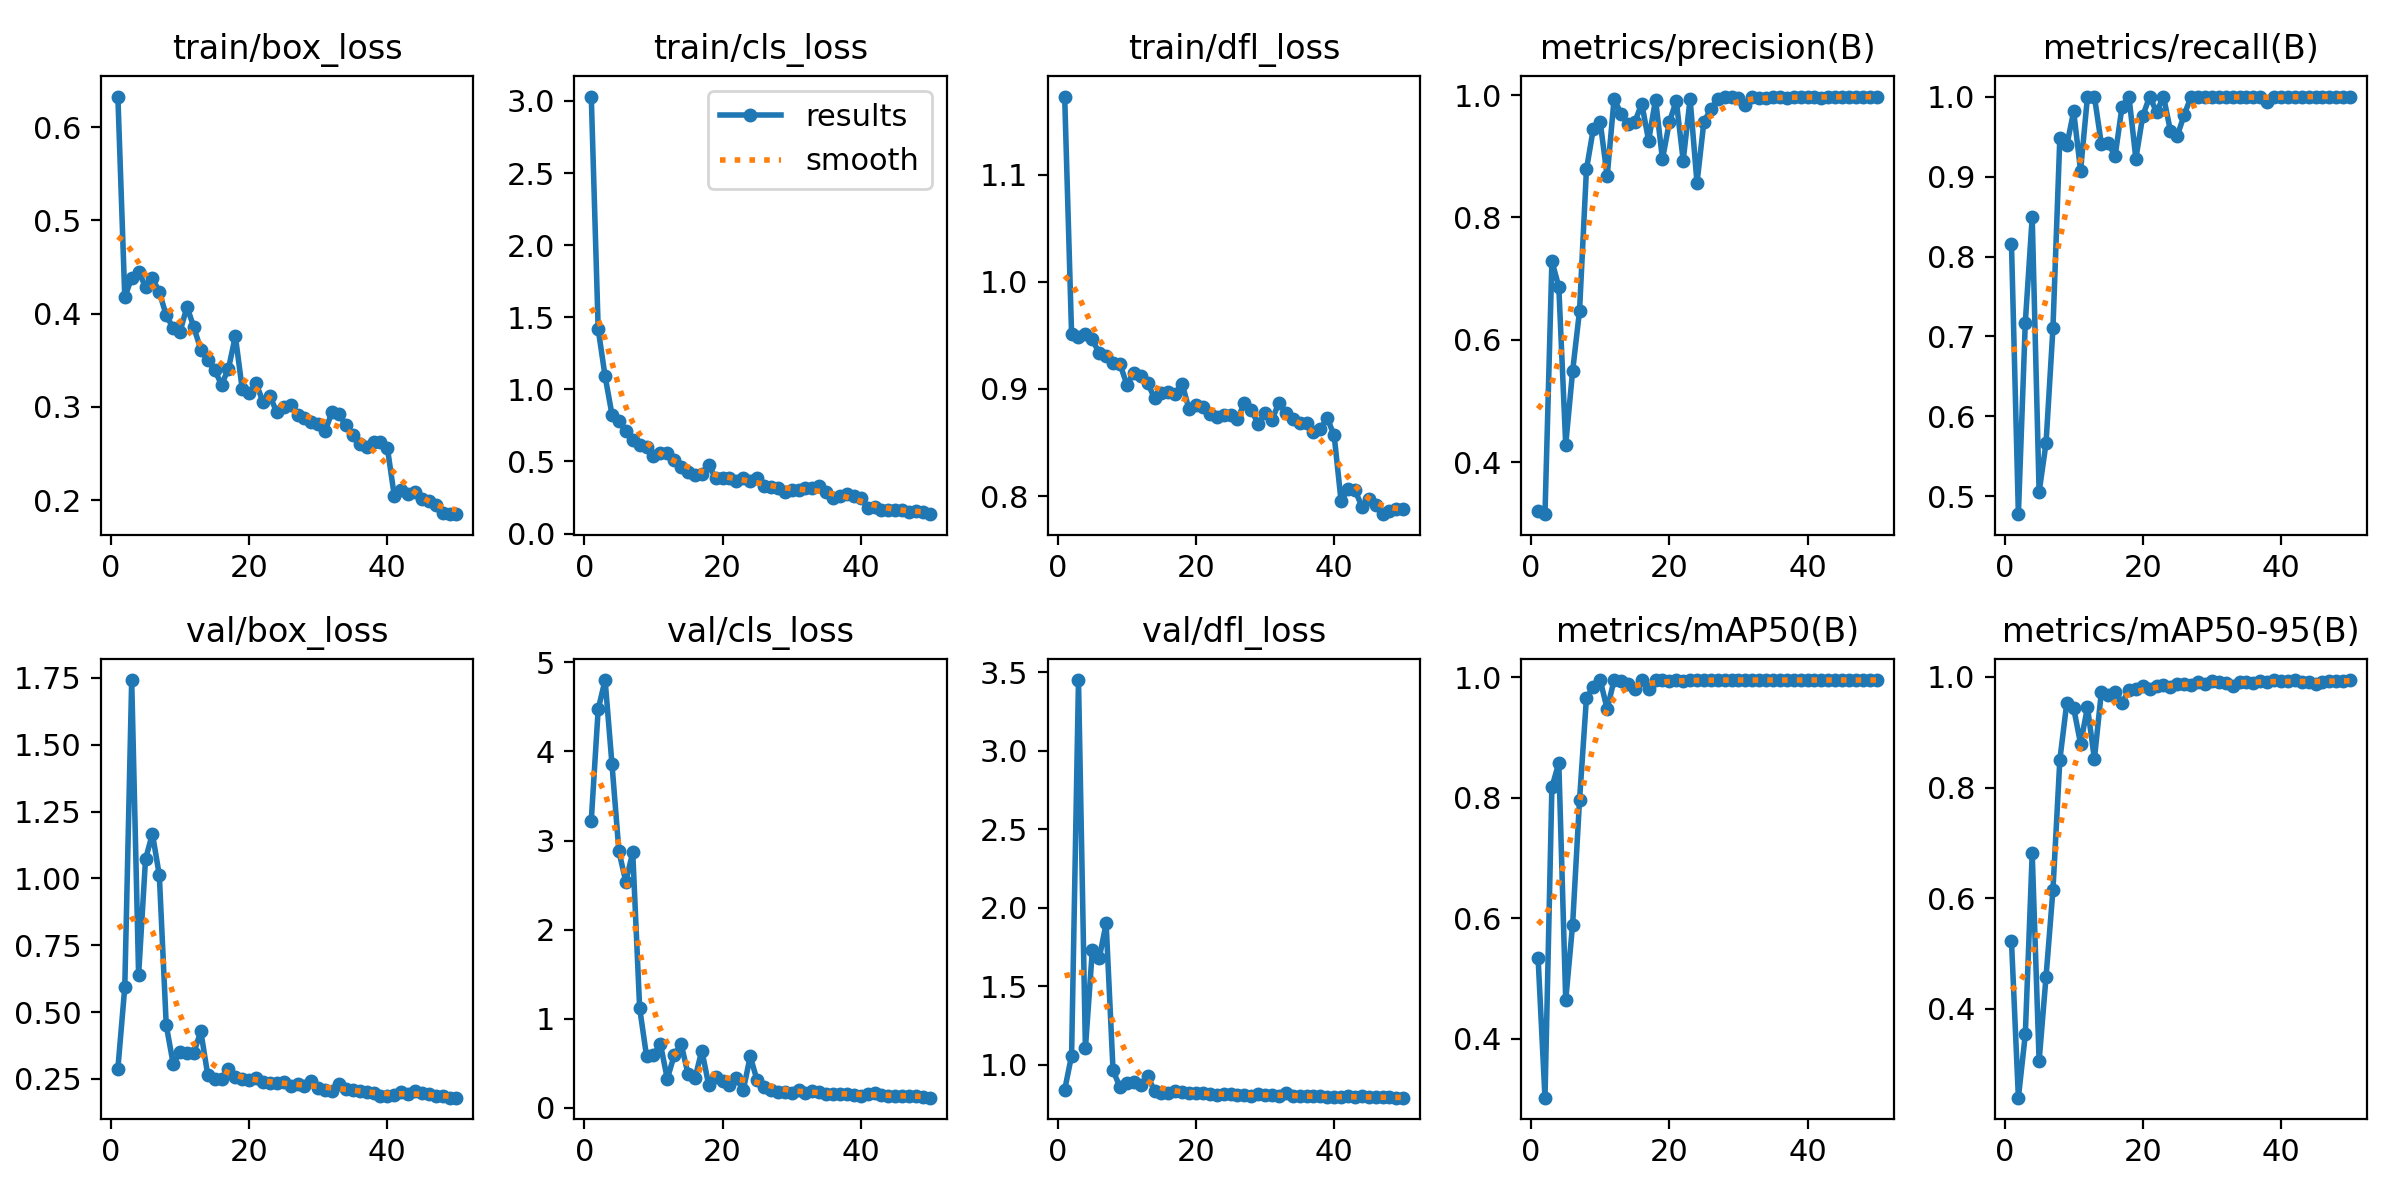

In [9]:
## plot ดูผลค่า loss ต่างๆ
Image(filename=f'{HOME}/runs/detect/train5/results.png', width=600)

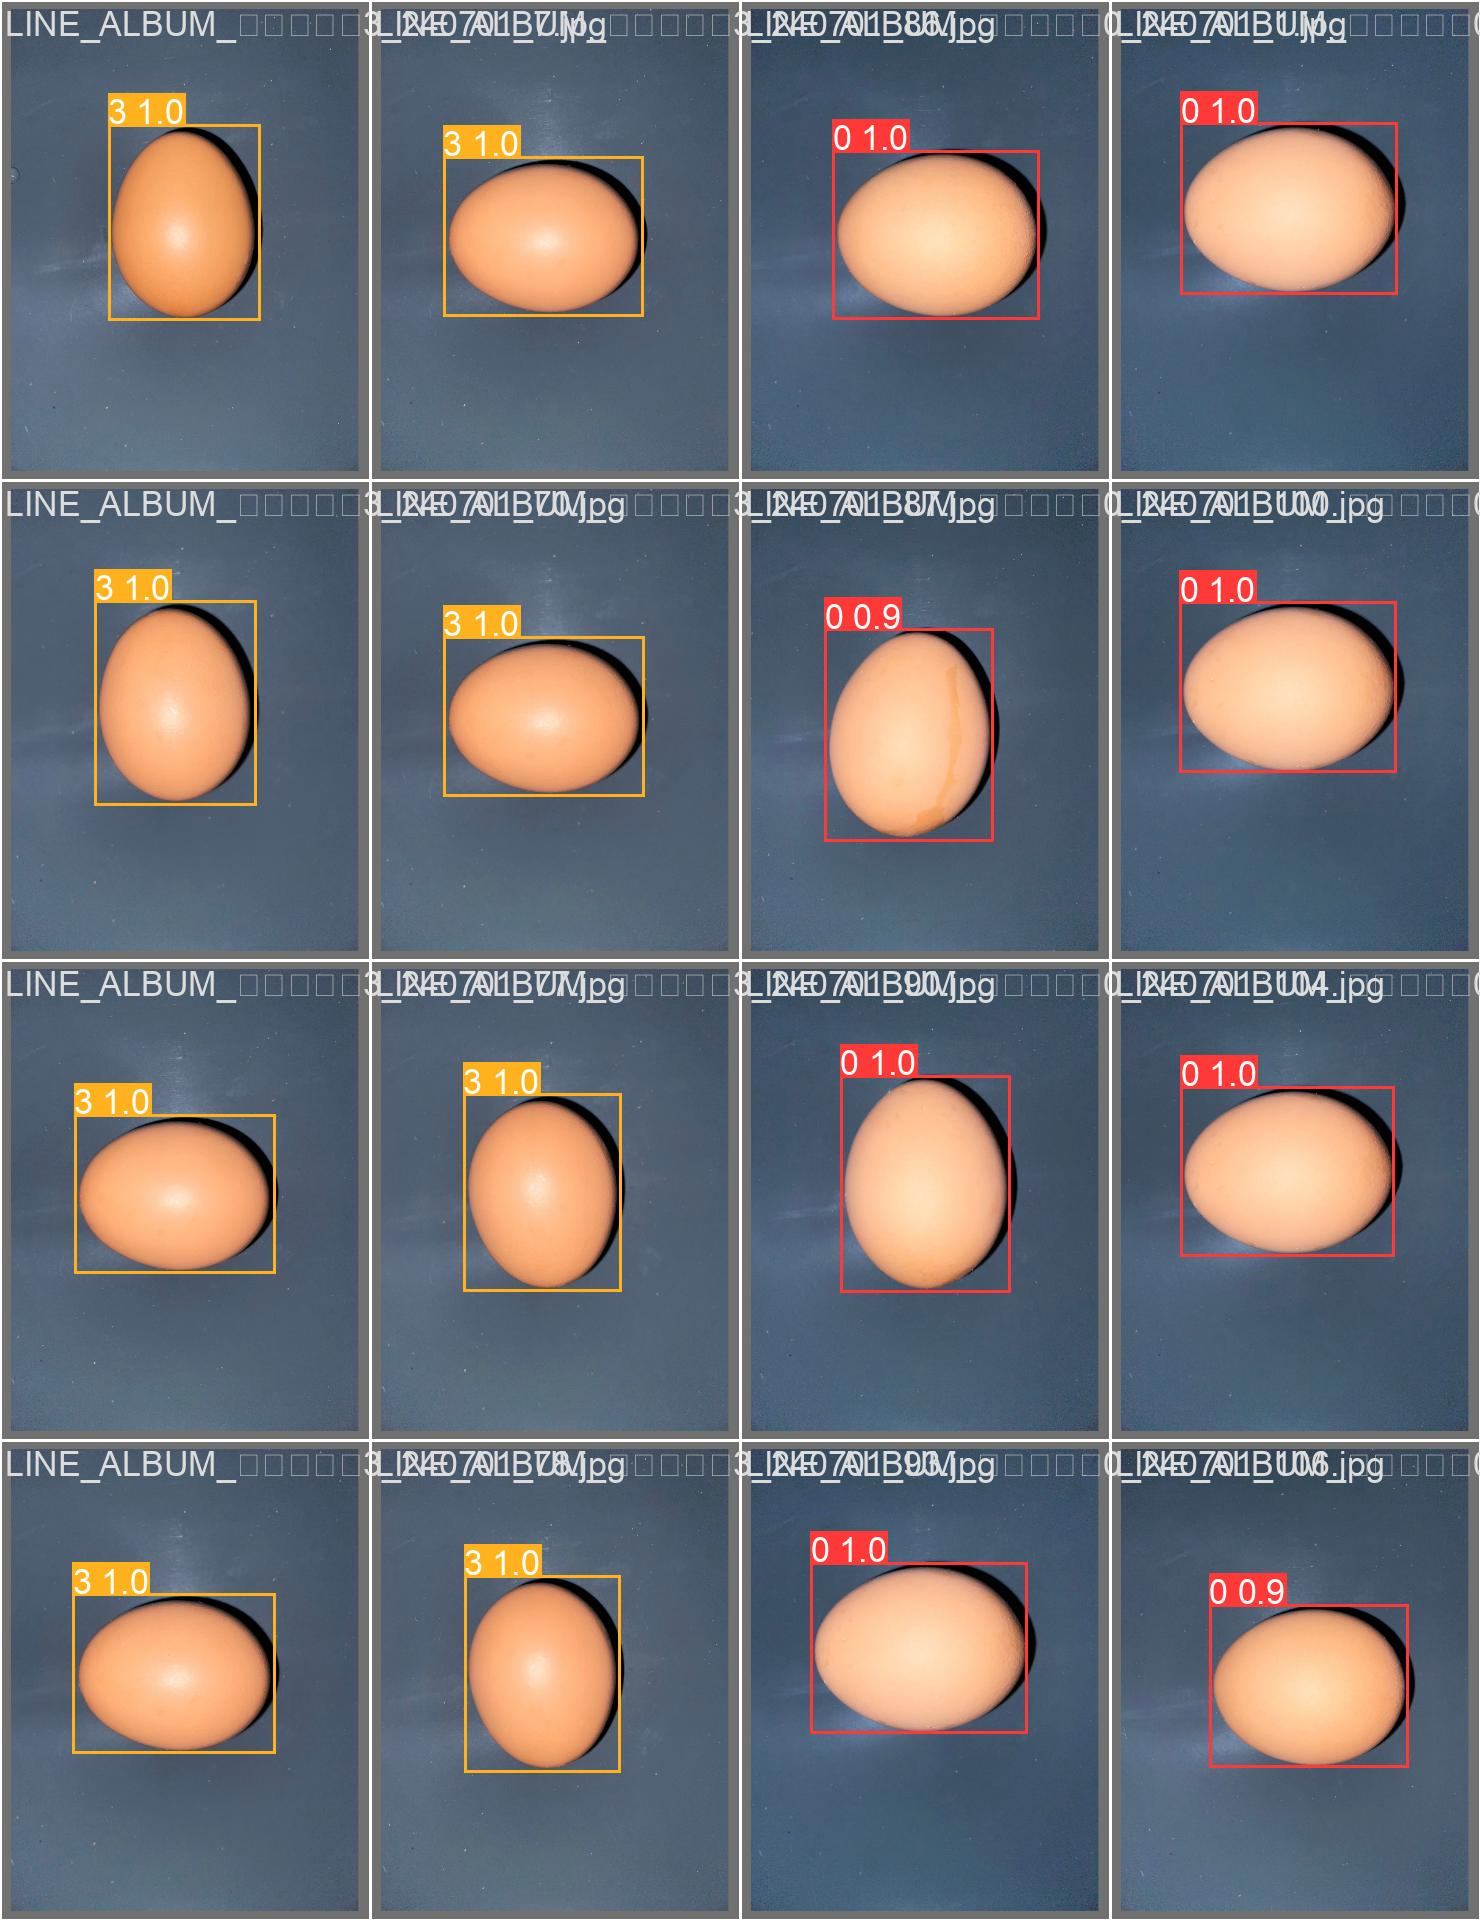

In [10]:
## ลอง plot results ของชุดข้อมูล validation (เลขข้างบนกล่องตัวแรกหมายถึงเบอร์ไขที่โมเดลทำนาย เลขถัดมาคือค่า confidence score หรือค่าความมั่นใจในคำตอบของโมเดล)
Image(filename=f'{HOME}/runs/detect/train5/val_batch0_pred.jpg', width=600)

## test

In [11]:
# %cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={config['test']}/images save=True

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [12]:
import glob

In [13]:
test_files = glob.glob("Eggs_Train_Test_Val/test/images/*.jpg")
len(test_files)

48

In [14]:
from ultralytics import YOLO

# Load a model
model = YOLO(f"{HOME}/runs/detect/train/weights/best.pt")  # เรียกใช้โมเดลทราเราเทรน ไฟล์ชื่อ best.pt จะเป็นไฟล์ที่ได้ผลดีที่สุด

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [15]:
# เทสโมเดลในข้อมูลชุดเทสทั้งหมด 15 รอบและตรวจคำตอบ
round_list = {}

for i in range(1, 16): # เทส 15 รอบ
    print('รอบที่ {}'.format(str(i)))
    results = model(test_files)  # return a list of Results objects
    # Process results list
    rows = []
    for result in results:
        image_path = result.path # ชื่อไฟล์รูปภาพ
        rs =  result.boxes
        pred_class = rs.cls.item()  # ผลที่โมเดลทำนายขนาดไข่ [0,1,2,3]
        bbox_xywh = rs.xywh[0].to('cpu').tolist() # กล่องที่ตรวจจับไข่
        confidence = rs.conf.item()  # ค่าความมั่นใจในผลที่ทำนาย มีค่า 0-1 (1 คือมั่นใจว่าเป็นไข่เบอร์นั้นๆ 100%)


        ### การตรวจคำตอบ
        gt = image_path.split('/')[-1].split('.')[0] # ดึงเอาคำตอบหรือผลเฉลยจากชื่อรูปภาพ -> Eggs_Train_Test_Val/test/images/3.9.jpg

        if int(gt) == int(pred_class): # ถ้าผลตรงกันคือถูกต้อง
            rows.append("ถูก")
        else:
            rows.append("ผิด") # ทำนายผิด

        # rows.append({
        # {"image_path" : image_path,
        # 'pred_class' : pred_class,
        # 'bbox' : bbox_xywh,
        # 'confidence' : confidence
        # })

    round_list['รอบที่ {}'.format(str(i))] = rows

รอบที่ 1



0: 800x608 1 0, 1: 800x608 1 0, 2: 800x608 1 0, 3: 800x608 1 0, 4: 800x608 1 0, 5: 800x608 1 1, 6: 800x608 1 1, 7: 800x608 1 3, 8: 800x608 1 0, 9: 800x608 1 0, 10: 800x608 1 3, 11: 800x608 1 2, 12: 800x608 1 0, 13: 800x608 1 0, 14: 800x608 1 0, 15: 800x608 1 1, 16: 800x608 1 0, 17: 800x608 1 1, 18: 800x608 1 1, 19: 800x608 1 0, 20: 800x608 1 1, 21: 800x608 1 1, 22: 800x608 1 2, 23: 800x608 1 1, 24: 800x608 1 1, 25: 800x608 1 3, 26: 800x608 1 2, 27: 800x608 1 2, 28: 800x608 1 2, 29: 800x608 1 1, 30: 800x608 1 3, 31: 800x608 1 3, 32: 800x608 1 1, 33: 800x608 1 2, 34: 800x608 1 1, 35: 800x608 1 3, 36: 800x608 1 3, 37: 800x608 1 2, 38: 800x608 1 2, 39: 800x608 1 3, 40: 800x608 1 2, 41: 800x608 1 2, 42: 800x608 1 3, 43: 800x608 1 3, 44: 800x608 1 3, 45: 800x608 1 2, 46: 800x608 1 3, 47: 800x608 1 2, 492.3ms
Speed: 4.5ms preprocess, 10.3ms inference, 13.0ms postprocess per image at shape (1, 3, 800, 608)



รอบที่ 2


0: 800x608 1 0, 1: 800x608 1 0, 2: 800x608 1 0, 3: 800x608 1 0, 4: 800x608 1 0, 5: 800x608 1 1, 6: 800x608 1 1, 7: 800x608 1 3, 8: 800x608 1 0, 9: 800x608 1 0, 10: 800x608 1 3, 11: 800x608 1 2, 12: 800x608 1 0, 13: 800x608 1 0, 14: 800x608 1 0, 15: 800x608 1 1, 16: 800x608 1 0, 17: 800x608 1 1, 18: 800x608 1 1, 19: 800x608 1 0, 20: 800x608 1 1, 21: 800x608 1 1, 22: 800x608 1 2, 23: 800x608 1 1, 24: 800x608 1 1, 25: 800x608 1 3, 26: 800x608 1 2, 27: 800x608 1 2, 28: 800x608 1 2, 29: 800x608 1 1, 30: 800x608 1 3, 31: 800x608 1 3, 32: 800x608 1 1, 33: 800x608 1 2, 34: 800x608 1 1, 35: 800x608 1 3, 36: 800x608 1 3, 37: 800x608 1 2, 38: 800x608 1 2, 39: 800x608 1 3, 40: 800x608 1 2, 41: 800x608 1 2, 42: 800x608 1 3, 43: 800x608 1 3, 44: 800x608 1 3, 45: 800x608 1 2, 46: 800x608 1 3, 47: 800x608 1 2, 493.7ms
Speed: 4.1ms preprocess, 10.3ms inference, 0.8ms postprocess per image at shape (1, 3, 800, 608)



รอบที่ 3


0: 800x608 1 0, 1: 800x608 1 0, 2: 800x608 1 0, 3: 800x608 1 0, 4: 800x608 1 0, 5: 800x608 1 1, 6: 800x608 1 1, 7: 800x608 1 3, 8: 800x608 1 0, 9: 800x608 1 0, 10: 800x608 1 3, 11: 800x608 1 2, 12: 800x608 1 0, 13: 800x608 1 0, 14: 800x608 1 0, 15: 800x608 1 1, 16: 800x608 1 0, 17: 800x608 1 1, 18: 800x608 1 1, 19: 800x608 1 0, 20: 800x608 1 1, 21: 800x608 1 1, 22: 800x608 1 2, 23: 800x608 1 1, 24: 800x608 1 1, 25: 800x608 1 3, 26: 800x608 1 2, 27: 800x608 1 2, 28: 800x608 1 2, 29: 800x608 1 1, 30: 800x608 1 3, 31: 800x608 1 3, 32: 800x608 1 1, 33: 800x608 1 2, 34: 800x608 1 1, 35: 800x608 1 3, 36: 800x608 1 3, 37: 800x608 1 2, 38: 800x608 1 2, 39: 800x608 1 3, 40: 800x608 1 2, 41: 800x608 1 2, 42: 800x608 1 3, 43: 800x608 1 3, 44: 800x608 1 3, 45: 800x608 1 2, 46: 800x608 1 3, 47: 800x608 1 2, 426.4ms
Speed: 4.0ms preprocess, 8.9ms inference, 0.8ms postprocess per image at shape (1, 3, 800, 608)



รอบที่ 4


0: 800x608 1 0, 1: 800x608 1 0, 2: 800x608 1 0, 3: 800x608 1 0, 4: 800x608 1 0, 5: 800x608 1 1, 6: 800x608 1 1, 7: 800x608 1 3, 8: 800x608 1 0, 9: 800x608 1 0, 10: 800x608 1 3, 11: 800x608 1 2, 12: 800x608 1 0, 13: 800x608 1 0, 14: 800x608 1 0, 15: 800x608 1 1, 16: 800x608 1 0, 17: 800x608 1 1, 18: 800x608 1 1, 19: 800x608 1 0, 20: 800x608 1 1, 21: 800x608 1 1, 22: 800x608 1 2, 23: 800x608 1 1, 24: 800x608 1 1, 25: 800x608 1 3, 26: 800x608 1 2, 27: 800x608 1 2, 28: 800x608 1 2, 29: 800x608 1 1, 30: 800x608 1 3, 31: 800x608 1 3, 32: 800x608 1 1, 33: 800x608 1 2, 34: 800x608 1 1, 35: 800x608 1 3, 36: 800x608 1 3, 37: 800x608 1 2, 38: 800x608 1 2, 39: 800x608 1 3, 40: 800x608 1 2, 41: 800x608 1 2, 42: 800x608 1 3, 43: 800x608 1 3, 44: 800x608 1 3, 45: 800x608 1 2, 46: 800x608 1 3, 47: 800x608 1 2, 427.8ms
Speed: 3.8ms preprocess, 8.9ms inference, 0.8ms postprocess per image at shape (1, 3, 800, 608)



รอบที่ 5


0: 800x608 1 0, 1: 800x608 1 0, 2: 800x608 1 0, 3: 800x608 1 0, 4: 800x608 1 0, 5: 800x608 1 1, 6: 800x608 1 1, 7: 800x608 1 3, 8: 800x608 1 0, 9: 800x608 1 0, 10: 800x608 1 3, 11: 800x608 1 2, 12: 800x608 1 0, 13: 800x608 1 0, 14: 800x608 1 0, 15: 800x608 1 1, 16: 800x608 1 0, 17: 800x608 1 1, 18: 800x608 1 1, 19: 800x608 1 0, 20: 800x608 1 1, 21: 800x608 1 1, 22: 800x608 1 2, 23: 800x608 1 1, 24: 800x608 1 1, 25: 800x608 1 3, 26: 800x608 1 2, 27: 800x608 1 2, 28: 800x608 1 2, 29: 800x608 1 1, 30: 800x608 1 3, 31: 800x608 1 3, 32: 800x608 1 1, 33: 800x608 1 2, 34: 800x608 1 1, 35: 800x608 1 3, 36: 800x608 1 3, 37: 800x608 1 2, 38: 800x608 1 2, 39: 800x608 1 3, 40: 800x608 1 2, 41: 800x608 1 2, 42: 800x608 1 3, 43: 800x608 1 3, 44: 800x608 1 3, 45: 800x608 1 2, 46: 800x608 1 3, 47: 800x608 1 2, 426.2ms
Speed: 5.2ms preprocess, 8.9ms inference, 1.0ms postprocess per image at shape (1, 3, 800, 608)



รอบที่ 6


0: 800x608 1 0, 1: 800x608 1 0, 2: 800x608 1 0, 3: 800x608 1 0, 4: 800x608 1 0, 5: 800x608 1 1, 6: 800x608 1 1, 7: 800x608 1 3, 8: 800x608 1 0, 9: 800x608 1 0, 10: 800x608 1 3, 11: 800x608 1 2, 12: 800x608 1 0, 13: 800x608 1 0, 14: 800x608 1 0, 15: 800x608 1 1, 16: 800x608 1 0, 17: 800x608 1 1, 18: 800x608 1 1, 19: 800x608 1 0, 20: 800x608 1 1, 21: 800x608 1 1, 22: 800x608 1 2, 23: 800x608 1 1, 24: 800x608 1 1, 25: 800x608 1 3, 26: 800x608 1 2, 27: 800x608 1 2, 28: 800x608 1 2, 29: 800x608 1 1, 30: 800x608 1 3, 31: 800x608 1 3, 32: 800x608 1 1, 33: 800x608 1 2, 34: 800x608 1 1, 35: 800x608 1 3, 36: 800x608 1 3, 37: 800x608 1 2, 38: 800x608 1 2, 39: 800x608 1 3, 40: 800x608 1 2, 41: 800x608 1 2, 42: 800x608 1 3, 43: 800x608 1 3, 44: 800x608 1 3, 45: 800x608 1 2, 46: 800x608 1 3, 47: 800x608 1 2, 499.2ms
Speed: 5.9ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 608)



รอบที่ 7


0: 800x608 1 0, 1: 800x608 1 0, 2: 800x608 1 0, 3: 800x608 1 0, 4: 800x608 1 0, 5: 800x608 1 1, 6: 800x608 1 1, 7: 800x608 1 3, 8: 800x608 1 0, 9: 800x608 1 0, 10: 800x608 1 3, 11: 800x608 1 2, 12: 800x608 1 0, 13: 800x608 1 0, 14: 800x608 1 0, 15: 800x608 1 1, 16: 800x608 1 0, 17: 800x608 1 1, 18: 800x608 1 1, 19: 800x608 1 0, 20: 800x608 1 1, 21: 800x608 1 1, 22: 800x608 1 2, 23: 800x608 1 1, 24: 800x608 1 1, 25: 800x608 1 3, 26: 800x608 1 2, 27: 800x608 1 2, 28: 800x608 1 2, 29: 800x608 1 1, 30: 800x608 1 3, 31: 800x608 1 3, 32: 800x608 1 1, 33: 800x608 1 2, 34: 800x608 1 1, 35: 800x608 1 3, 36: 800x608 1 3, 37: 800x608 1 2, 38: 800x608 1 2, 39: 800x608 1 3, 40: 800x608 1 2, 41: 800x608 1 2, 42: 800x608 1 3, 43: 800x608 1 3, 44: 800x608 1 3, 45: 800x608 1 2, 46: 800x608 1 3, 47: 800x608 1 2, 429.6ms
Speed: 4.0ms preprocess, 8.9ms inference, 0.8ms postprocess per image at shape (1, 3, 800, 608)



รอบที่ 8


0: 800x608 1 0, 1: 800x608 1 0, 2: 800x608 1 0, 3: 800x608 1 0, 4: 800x608 1 0, 5: 800x608 1 1, 6: 800x608 1 1, 7: 800x608 1 3, 8: 800x608 1 0, 9: 800x608 1 0, 10: 800x608 1 3, 11: 800x608 1 2, 12: 800x608 1 0, 13: 800x608 1 0, 14: 800x608 1 0, 15: 800x608 1 1, 16: 800x608 1 0, 17: 800x608 1 1, 18: 800x608 1 1, 19: 800x608 1 0, 20: 800x608 1 1, 21: 800x608 1 1, 22: 800x608 1 2, 23: 800x608 1 1, 24: 800x608 1 1, 25: 800x608 1 3, 26: 800x608 1 2, 27: 800x608 1 2, 28: 800x608 1 2, 29: 800x608 1 1, 30: 800x608 1 3, 31: 800x608 1 3, 32: 800x608 1 1, 33: 800x608 1 2, 34: 800x608 1 1, 35: 800x608 1 3, 36: 800x608 1 3, 37: 800x608 1 2, 38: 800x608 1 2, 39: 800x608 1 3, 40: 800x608 1 2, 41: 800x608 1 2, 42: 800x608 1 3, 43: 800x608 1 3, 44: 800x608 1 3, 45: 800x608 1 2, 46: 800x608 1 3, 47: 800x608 1 2, 430.1ms
Speed: 3.8ms preprocess, 9.0ms inference, 0.8ms postprocess per image at shape (1, 3, 800, 608)



รอบที่ 9


0: 800x608 1 0, 1: 800x608 1 0, 2: 800x608 1 0, 3: 800x608 1 0, 4: 800x608 1 0, 5: 800x608 1 1, 6: 800x608 1 1, 7: 800x608 1 3, 8: 800x608 1 0, 9: 800x608 1 0, 10: 800x608 1 3, 11: 800x608 1 2, 12: 800x608 1 0, 13: 800x608 1 0, 14: 800x608 1 0, 15: 800x608 1 1, 16: 800x608 1 0, 17: 800x608 1 1, 18: 800x608 1 1, 19: 800x608 1 0, 20: 800x608 1 1, 21: 800x608 1 1, 22: 800x608 1 2, 23: 800x608 1 1, 24: 800x608 1 1, 25: 800x608 1 3, 26: 800x608 1 2, 27: 800x608 1 2, 28: 800x608 1 2, 29: 800x608 1 1, 30: 800x608 1 3, 31: 800x608 1 3, 32: 800x608 1 1, 33: 800x608 1 2, 34: 800x608 1 1, 35: 800x608 1 3, 36: 800x608 1 3, 37: 800x608 1 2, 38: 800x608 1 2, 39: 800x608 1 3, 40: 800x608 1 2, 41: 800x608 1 2, 42: 800x608 1 3, 43: 800x608 1 3, 44: 800x608 1 3, 45: 800x608 1 2, 46: 800x608 1 3, 47: 800x608 1 2, 430.6ms
Speed: 3.8ms preprocess, 9.0ms inference, 0.8ms postprocess per image at shape (1, 3, 800, 608)



รอบที่ 10


0: 800x608 1 0, 1: 800x608 1 0, 2: 800x608 1 0, 3: 800x608 1 0, 4: 800x608 1 0, 5: 800x608 1 1, 6: 800x608 1 1, 7: 800x608 1 3, 8: 800x608 1 0, 9: 800x608 1 0, 10: 800x608 1 3, 11: 800x608 1 2, 12: 800x608 1 0, 13: 800x608 1 0, 14: 800x608 1 0, 15: 800x608 1 1, 16: 800x608 1 0, 17: 800x608 1 1, 18: 800x608 1 1, 19: 800x608 1 0, 20: 800x608 1 1, 21: 800x608 1 1, 22: 800x608 1 2, 23: 800x608 1 1, 24: 800x608 1 1, 25: 800x608 1 3, 26: 800x608 1 2, 27: 800x608 1 2, 28: 800x608 1 2, 29: 800x608 1 1, 30: 800x608 1 3, 31: 800x608 1 3, 32: 800x608 1 1, 33: 800x608 1 2, 34: 800x608 1 1, 35: 800x608 1 3, 36: 800x608 1 3, 37: 800x608 1 2, 38: 800x608 1 2, 39: 800x608 1 3, 40: 800x608 1 2, 41: 800x608 1 2, 42: 800x608 1 3, 43: 800x608 1 3, 44: 800x608 1 3, 45: 800x608 1 2, 46: 800x608 1 3, 47: 800x608 1 2, 425.4ms
Speed: 3.8ms preprocess, 8.9ms inference, 0.8ms postprocess per image at shape (1, 3, 800, 608)



รอบที่ 11


0: 800x608 1 0, 1: 800x608 1 0, 2: 800x608 1 0, 3: 800x608 1 0, 4: 800x608 1 0, 5: 800x608 1 1, 6: 800x608 1 1, 7: 800x608 1 3, 8: 800x608 1 0, 9: 800x608 1 0, 10: 800x608 1 3, 11: 800x608 1 2, 12: 800x608 1 0, 13: 800x608 1 0, 14: 800x608 1 0, 15: 800x608 1 1, 16: 800x608 1 0, 17: 800x608 1 1, 18: 800x608 1 1, 19: 800x608 1 0, 20: 800x608 1 1, 21: 800x608 1 1, 22: 800x608 1 2, 23: 800x608 1 1, 24: 800x608 1 1, 25: 800x608 1 3, 26: 800x608 1 2, 27: 800x608 1 2, 28: 800x608 1 2, 29: 800x608 1 1, 30: 800x608 1 3, 31: 800x608 1 3, 32: 800x608 1 1, 33: 800x608 1 2, 34: 800x608 1 1, 35: 800x608 1 3, 36: 800x608 1 3, 37: 800x608 1 2, 38: 800x608 1 2, 39: 800x608 1 3, 40: 800x608 1 2, 41: 800x608 1 2, 42: 800x608 1 3, 43: 800x608 1 3, 44: 800x608 1 3, 45: 800x608 1 2, 46: 800x608 1 3, 47: 800x608 1 2, 427.9ms
Speed: 3.7ms preprocess, 8.9ms inference, 0.9ms postprocess per image at shape (1, 3, 800, 608)



รอบที่ 12


0: 800x608 1 0, 1: 800x608 1 0, 2: 800x608 1 0, 3: 800x608 1 0, 4: 800x608 1 0, 5: 800x608 1 1, 6: 800x608 1 1, 7: 800x608 1 3, 8: 800x608 1 0, 9: 800x608 1 0, 10: 800x608 1 3, 11: 800x608 1 2, 12: 800x608 1 0, 13: 800x608 1 0, 14: 800x608 1 0, 15: 800x608 1 1, 16: 800x608 1 0, 17: 800x608 1 1, 18: 800x608 1 1, 19: 800x608 1 0, 20: 800x608 1 1, 21: 800x608 1 1, 22: 800x608 1 2, 23: 800x608 1 1, 24: 800x608 1 1, 25: 800x608 1 3, 26: 800x608 1 2, 27: 800x608 1 2, 28: 800x608 1 2, 29: 800x608 1 1, 30: 800x608 1 3, 31: 800x608 1 3, 32: 800x608 1 1, 33: 800x608 1 2, 34: 800x608 1 1, 35: 800x608 1 3, 36: 800x608 1 3, 37: 800x608 1 2, 38: 800x608 1 2, 39: 800x608 1 3, 40: 800x608 1 2, 41: 800x608 1 2, 42: 800x608 1 3, 43: 800x608 1 3, 44: 800x608 1 3, 45: 800x608 1 2, 46: 800x608 1 3, 47: 800x608 1 2, 429.5ms
Speed: 6.0ms preprocess, 8.9ms inference, 1.1ms postprocess per image at shape (1, 3, 800, 608)



รอบที่ 13


0: 800x608 1 0, 1: 800x608 1 0, 2: 800x608 1 0, 3: 800x608 1 0, 4: 800x608 1 0, 5: 800x608 1 1, 6: 800x608 1 1, 7: 800x608 1 3, 8: 800x608 1 0, 9: 800x608 1 0, 10: 800x608 1 3, 11: 800x608 1 2, 12: 800x608 1 0, 13: 800x608 1 0, 14: 800x608 1 0, 15: 800x608 1 1, 16: 800x608 1 0, 17: 800x608 1 1, 18: 800x608 1 1, 19: 800x608 1 0, 20: 800x608 1 1, 21: 800x608 1 1, 22: 800x608 1 2, 23: 800x608 1 1, 24: 800x608 1 1, 25: 800x608 1 3, 26: 800x608 1 2, 27: 800x608 1 2, 28: 800x608 1 2, 29: 800x608 1 1, 30: 800x608 1 3, 31: 800x608 1 3, 32: 800x608 1 1, 33: 800x608 1 2, 34: 800x608 1 1, 35: 800x608 1 3, 36: 800x608 1 3, 37: 800x608 1 2, 38: 800x608 1 2, 39: 800x608 1 3, 40: 800x608 1 2, 41: 800x608 1 2, 42: 800x608 1 3, 43: 800x608 1 3, 44: 800x608 1 3, 45: 800x608 1 2, 46: 800x608 1 3, 47: 800x608 1 2, 499.6ms
Speed: 5.2ms preprocess, 10.4ms inference, 0.8ms postprocess per image at shape (1, 3, 800, 608)



รอบที่ 14


0: 800x608 1 0, 1: 800x608 1 0, 2: 800x608 1 0, 3: 800x608 1 0, 4: 800x608 1 0, 5: 800x608 1 1, 6: 800x608 1 1, 7: 800x608 1 3, 8: 800x608 1 0, 9: 800x608 1 0, 10: 800x608 1 3, 11: 800x608 1 2, 12: 800x608 1 0, 13: 800x608 1 0, 14: 800x608 1 0, 15: 800x608 1 1, 16: 800x608 1 0, 17: 800x608 1 1, 18: 800x608 1 1, 19: 800x608 1 0, 20: 800x608 1 1, 21: 800x608 1 1, 22: 800x608 1 2, 23: 800x608 1 1, 24: 800x608 1 1, 25: 800x608 1 3, 26: 800x608 1 2, 27: 800x608 1 2, 28: 800x608 1 2, 29: 800x608 1 1, 30: 800x608 1 3, 31: 800x608 1 3, 32: 800x608 1 1, 33: 800x608 1 2, 34: 800x608 1 1, 35: 800x608 1 3, 36: 800x608 1 3, 37: 800x608 1 2, 38: 800x608 1 2, 39: 800x608 1 3, 40: 800x608 1 2, 41: 800x608 1 2, 42: 800x608 1 3, 43: 800x608 1 3, 44: 800x608 1 3, 45: 800x608 1 2, 46: 800x608 1 3, 47: 800x608 1 2, 427.8ms
Speed: 4.0ms preprocess, 8.9ms inference, 0.8ms postprocess per image at shape (1, 3, 800, 608)



รอบที่ 15


0: 800x608 1 0, 1: 800x608 1 0, 2: 800x608 1 0, 3: 800x608 1 0, 4: 800x608 1 0, 5: 800x608 1 1, 6: 800x608 1 1, 7: 800x608 1 3, 8: 800x608 1 0, 9: 800x608 1 0, 10: 800x608 1 3, 11: 800x608 1 2, 12: 800x608 1 0, 13: 800x608 1 0, 14: 800x608 1 0, 15: 800x608 1 1, 16: 800x608 1 0, 17: 800x608 1 1, 18: 800x608 1 1, 19: 800x608 1 0, 20: 800x608 1 1, 21: 800x608 1 1, 22: 800x608 1 2, 23: 800x608 1 1, 24: 800x608 1 1, 25: 800x608 1 3, 26: 800x608 1 2, 27: 800x608 1 2, 28: 800x608 1 2, 29: 800x608 1 1, 30: 800x608 1 3, 31: 800x608 1 3, 32: 800x608 1 1, 33: 800x608 1 2, 34: 800x608 1 1, 35: 800x608 1 3, 36: 800x608 1 3, 37: 800x608 1 2, 38: 800x608 1 2, 39: 800x608 1 3, 40: 800x608 1 2, 41: 800x608 1 2, 42: 800x608 1 3, 43: 800x608 1 3, 44: 800x608 1 3, 45: 800x608 1 2, 46: 800x608 1 3, 47: 800x608 1 2, 427.4ms
Speed: 6.0ms preprocess, 8.9ms inference, 0.8ms postprocess per image at shape (1, 3, 800, 608)


In [16]:
round_list['test_image'] = test_files
round_list['เบอร์ไข่'] = [i.split('/')[-1].split('.')[0] for i in test_files] # ดึงคำตอบเฉลยที่อยู่ในไฟล์รูปภาพ

In [17]:
import pandas as pd
df = pd.DataFrame(round_list)
df

,รอบที่ 1,รอบที่ 2,รอบที่ 3,รอบที่ 4,รอบที่ 5,รอบที่ 6,รอบที่ 7,รอบที่ 8,รอบที่ 9,รอบที่ 10,รอบที่ 11,รอบที่ 12,รอบที่ 13,รอบที่ 14,รอบที่ 15,test_image,เบอร์ไข่
0,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,Eggs_Train_Test_Val/test/images/0.12.jpg,0
1,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,Eggs_Train_Test_Val/test/images/0.8.jpg,0
2,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,Eggs_Train_Test_Val/test/images/0.1.jpg,0
3,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,Eggs_Train_Test_Val/test/images/0.2.jpg,0
4,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,Eggs_Train_Test_Val/test/images/0.9.jpg,0
5,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,Eggs_Train_Test_Val/test/images/1.3.jpg,1
6,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,Eggs_Train_Test_Val/test/images/1.2.jpg,1
7,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,Eggs_Train_Test_Val/test/images/3.8.jpg,3
8,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,Eggs_Train_Test_Val/test/images/0.10.jpg,0
9,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,ถูก,Eggs_Train_Test_Val/test/images/0.11.jpg,0


In [18]:
df.to_excel("eggs_classification_results.xlsx", index = False)# เซฟไฟล์